### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
#from stable_baselines.common.policies import MlpPolicy
from stable_baselines3 import PPO
from matplotlib import pyplot as plt

In [2]:
# Import classes
from rl_environment import Environment

### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 2
max_inventory_amount_regional_warehouses = 40
max_inventory_amount_central_warehouse = 100
customer_demand_per_step = [1,2,1]  # List needs one entry per regional warehouse 
simulation_length = 30
lead_time = 2
shipment_amount = 5

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount)

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 33
regional_warehouse_1 ; ID: 1 ; Inventory: 13 ; Demand: 1 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 13 ; Demand: 2 ; Lost sales: 0
________________________________________________________________________________
Environment Information
-----------------------
Observation space: MultiDiscrete([41 41])
Action space: MultiDiscrete([2 2])
Starting state: [13 13]
________________________________________________________________________________


### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = PPO("MlpPolicy", env, verbose=1)
ppo_model.learn(total_timesteps=80000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | 1.73     |
| time/              |          |
|    fps             | 1153     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 1.85        |
| time/                   |             |
|    fps                  | 764         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010568345 |
|    clip_fraction        | 0.0643      |
|    clip_range           | 0.2         |
|    entropy_loss   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 4.46        |
| time/                   |             |
|    fps                  | 612         |
|    iterations           | 11          |
|    time_elapsed         | 36          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.008488152 |
|    clip_fraction        | 0.0716      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.828      |
|    explained_variance   | 0.185       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.663       |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0117     |
|    value_loss           | 1.35        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 7.5         |
| time/                   |             |
|    fps                  | 620         |
|    iterations           | 21          |
|    time_elapsed         | 69          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.004852471 |
|    clip_fraction        | 0.0535      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.411      |
|    explained_variance   | 0.26        |
|    learning_rate        | 0.0003      |
|    loss                 | 1.27        |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00579    |
|    value_loss           | 2.65        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 10.2         |
| time/                   |              |
|    fps                  | 611          |
|    iterations           | 31           |
|    time_elapsed         | 103          |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0017109487 |
|    clip_fraction        | 0.0242       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.147       |
|    explained_variance   | 0.343        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.42         |
|    n_updates            | 300          |
|    policy_gradient_loss | -0.00331     |
|    value_loss           | 4.14         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

###### Learning Curve

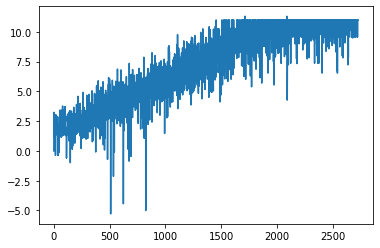

In [6]:
plt.plot(env.total_reward)
plt.show()

### Run simulation

In [7]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = {}
for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["Inventory:"]:
        inventory_levels[i].append(inv)
        i += 1
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 29 | Inventory: [12 11] | Action: [0 1] | Reward: 0.08 | 
Steps left: 28 | Inventory: [11  9] | Action: [0 0] | Reward: 0.09 | 
Steps left: 27 | Inventory: [10 12] | Action: [0 0] | Reward: 0.08 | 
Steps left: 26 | Inventory: [ 9 10] | Action: [0 0] | Reward: 0.1 | 
Steps left: 25 | Inventory: [8 8] | Action: [0 0] | Reward: 0.11 | 
Steps left: 24 | Inventory: [7 6] | Action: [0 0] | Reward: 0.13 | 
Steps left: 23 | Inventory: [6 4] | Action: [0 0] | Reward: 0.17 | 
Steps left: 22 | Inventory: [5 2] | Action: [0 1] | Reward: 0.25 | 
Steps left: 21 | Inventory: [4 0] | Action: [0 0] | Reward: 0.6 | 
Steps left: 20 | Inventory: [3 3] | Action: [0 1] | Reward: 0.25 | 
Steps left: 19 | Inventory: [2 1] | Action: [0 0] | Reward: 0.42 | 
Steps left: 18 | Inventory: [1 4] | Action: [1 0] | Reward: 0.35 | 
Steps left: 17 | Inventory: [0 2] | Action: [0 1] | Reward: 0.67 | 
Steps left: 16 | Inventory: [4 0] | Action: [0 0] | Reward: 0.6 | 
Steps left: 15 | Inventory: [3 3] | Action:

###### Inventory level graph

Regional warehouse 1


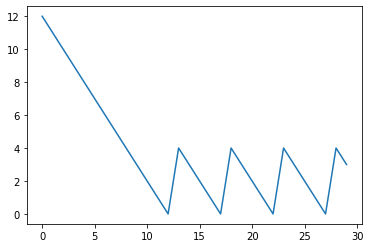

Regional warehouse 2


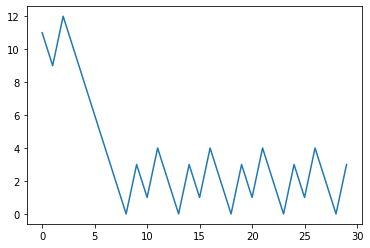

In [8]:
for rw_id in inventory_levels:
    print("Regional warehouse", rw_id)
    plt.plot(inventory_levels[rw_id])
    plt.show()